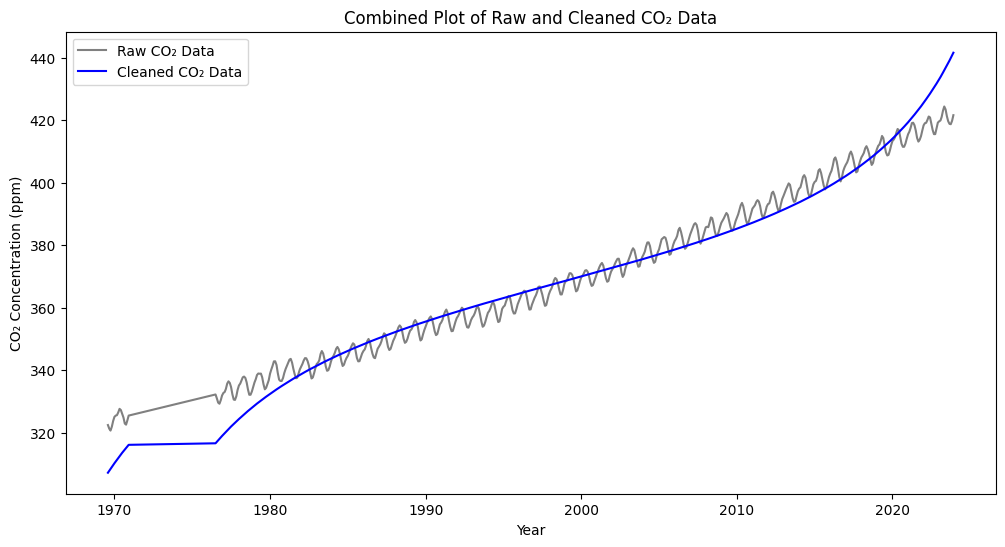

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import get_window

# Load the JSON data with the correct path
data = pd.read_json('/workspaces/CP1-24-HW5/mauna-loa-data/flask_monthly.json')

# Correct column names to match 'Year' and 'Month' from the JSON data
data['date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
data.set_index('date', inplace=True)
co2_values = data['CO2 (ppm)']

# Apply Padding and Windowing
padded_co2 = np.pad(co2_values, (100, 100), mode='reflect')  # Adding padding
window = get_window('hann', len(padded_co2))
windowed_data = padded_co2 * window

# Perform FFT
fft_data = fft(windowed_data)

# Noise Removal by Setting a Threshold for Low-Magnitude Frequencies
magnitude_threshold = 0.1 * np.max(np.abs(fft_data))  # Adjustable threshold
fft_data[np.abs(fft_data) < magnitude_threshold] = 0

# Inverse FFT and Undo Windowing and Padding
cleaned_data = ifft(fft_data).real
cleaned_data = cleaned_data[100:-100] / window[100:-100]  # Remove padding

# Plot Raw and Cleaned Data
plt.figure(figsize=(12, 6))
plt.plot(data.index, co2_values, label='Raw CO₂ Data', color='gray')
plt.plot(data.index, cleaned_data, label='Cleaned CO₂ Data', color='blue')
plt.xlabel('Year')
plt.ylabel('CO₂ Concentration (ppm)')
plt.title('Combined Plot of Raw and Cleaned CO₂ Data')
plt.legend()
plt.show()
